### IMPORT LIBRARY 📖

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics



### LOAD DATA 

In [2]:
df=pd.read_csv("C:/Users/LAP ME/Downloads/diamonds.csv")

### DATA EXPLORATION 

In [3]:
df.shape

(53940, 11)

In [5]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
df.sample(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
32148,32149,0.40,Very Good,F,VS1,62.2,55.0,786,4.68,4.74,2.93
22487,22488,1.54,Very Good,I,VVS2,62.7,57.0,10518,7.35,7.43,4.63
10713,10714,0.31,Premium,D,SI2,60.1,60.0,593,4.41,4.38,2.64
10749,10750,1.01,Ideal,H,SI1,62.7,56.0,4851,6.41,6.44,4.03
46005,46006,0.61,Very Good,E,SI1,63.3,60.0,1726,5.36,5.29,3.37


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [8]:
df.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [9]:
df.duplicated().any()

False

In [10]:
df.tail(4)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [12]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [13]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### DATA CLEANING 

In [14]:
df = df.drop(["Unnamed: 0"], axis=1)
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [15]:
#Dropping dimentionless diamonds
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)
df.shape

(53920, 10)

### VISUALIZATION ON DATA 📊📊😍

D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


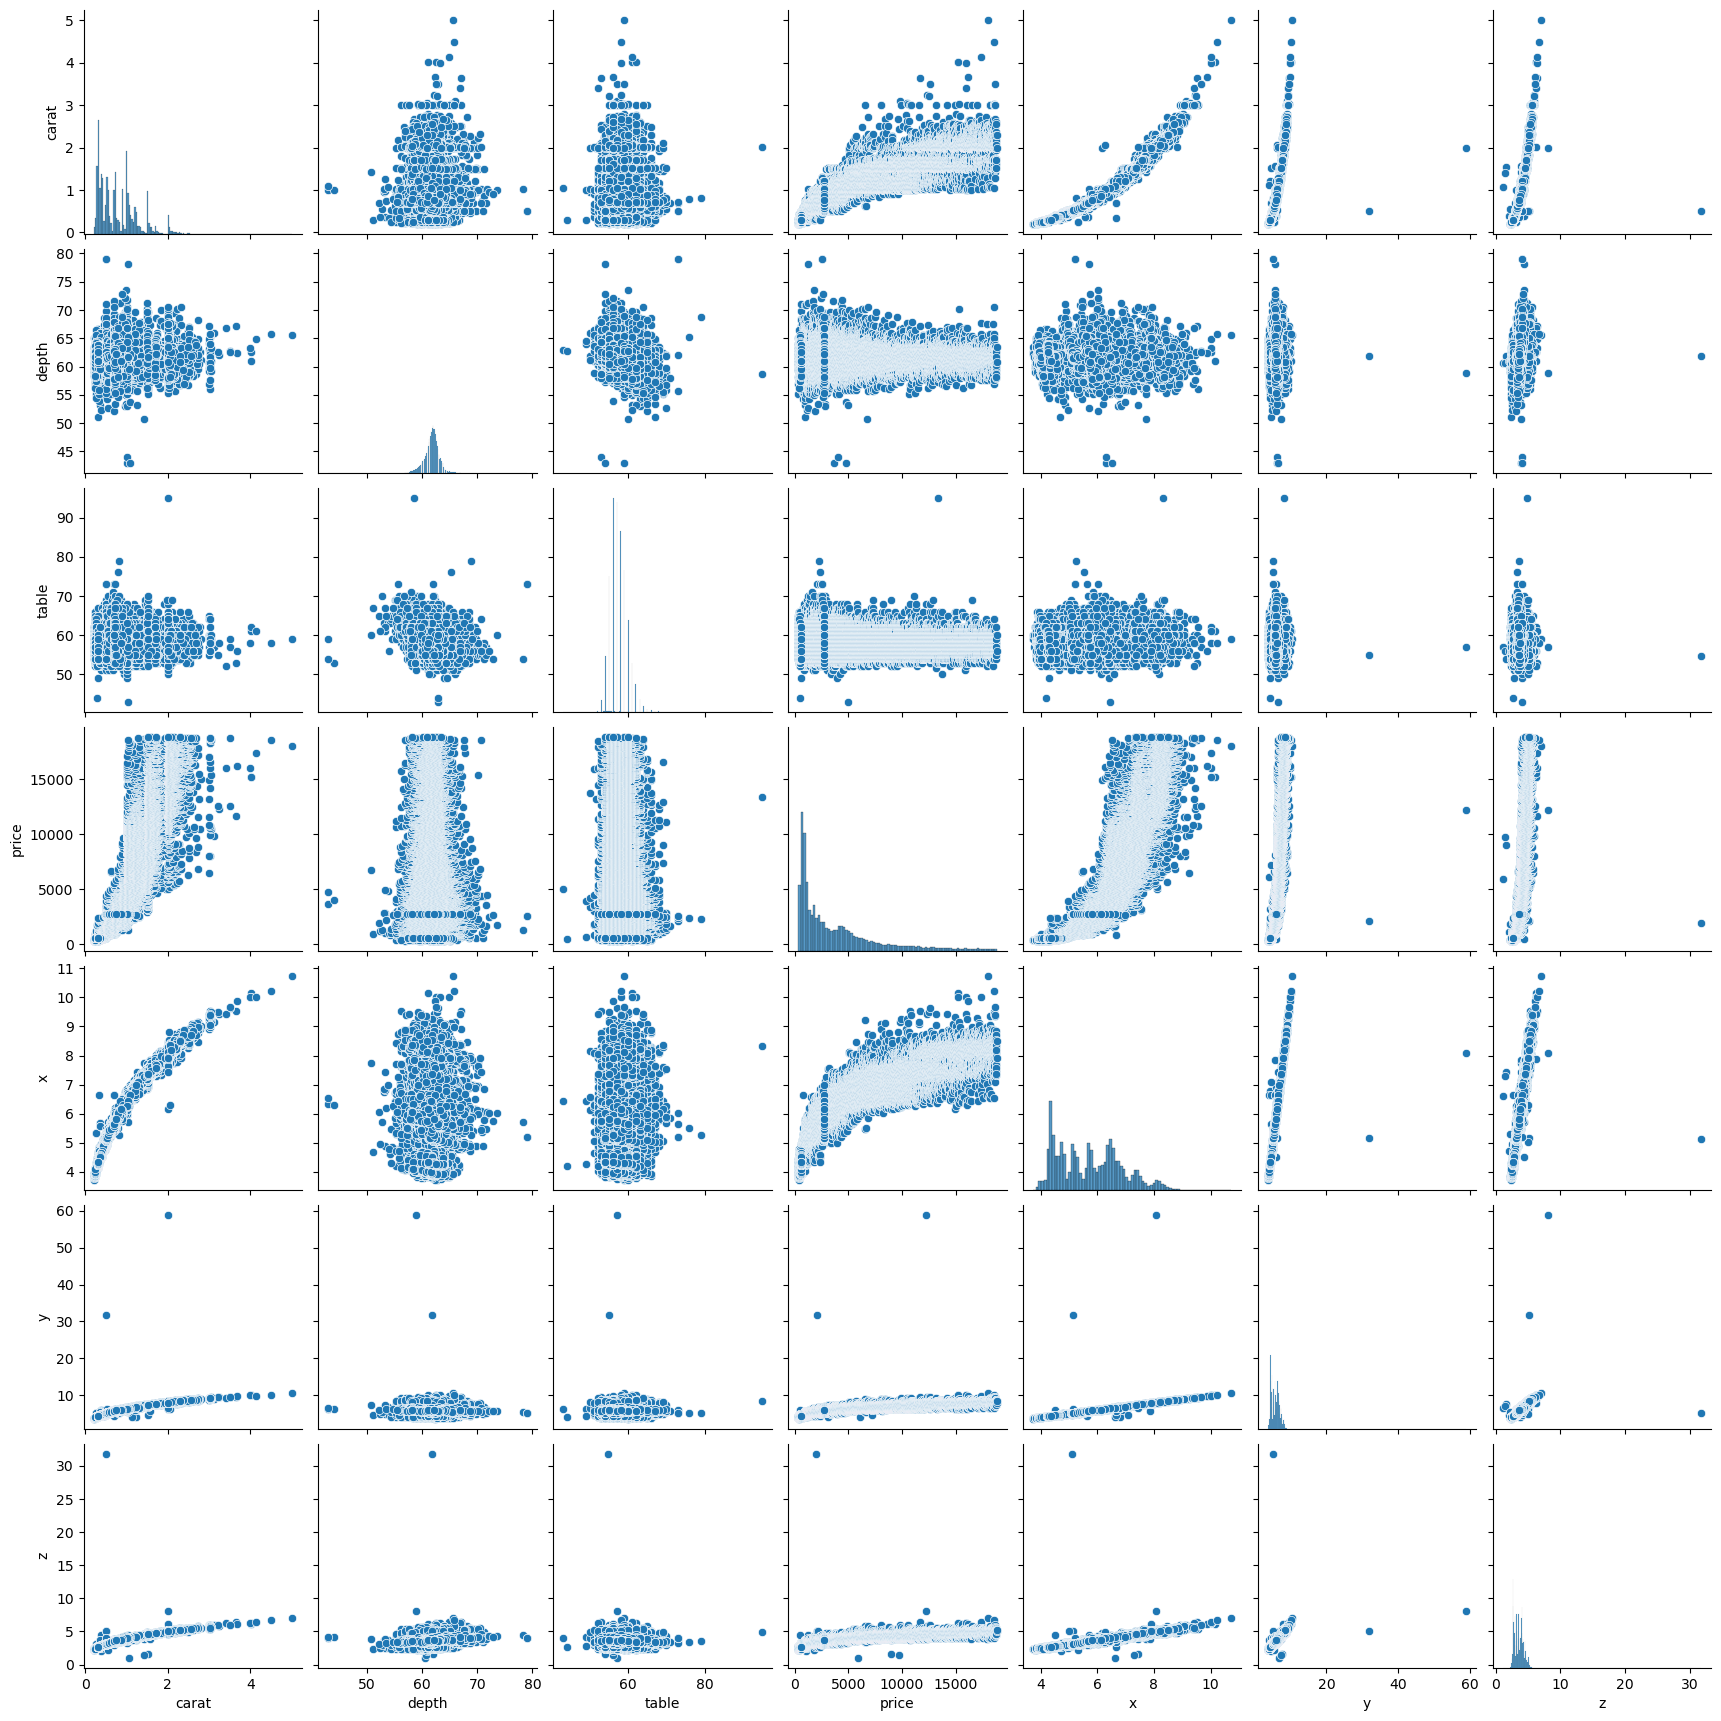

In [15]:
sns.pairplot(df)

D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


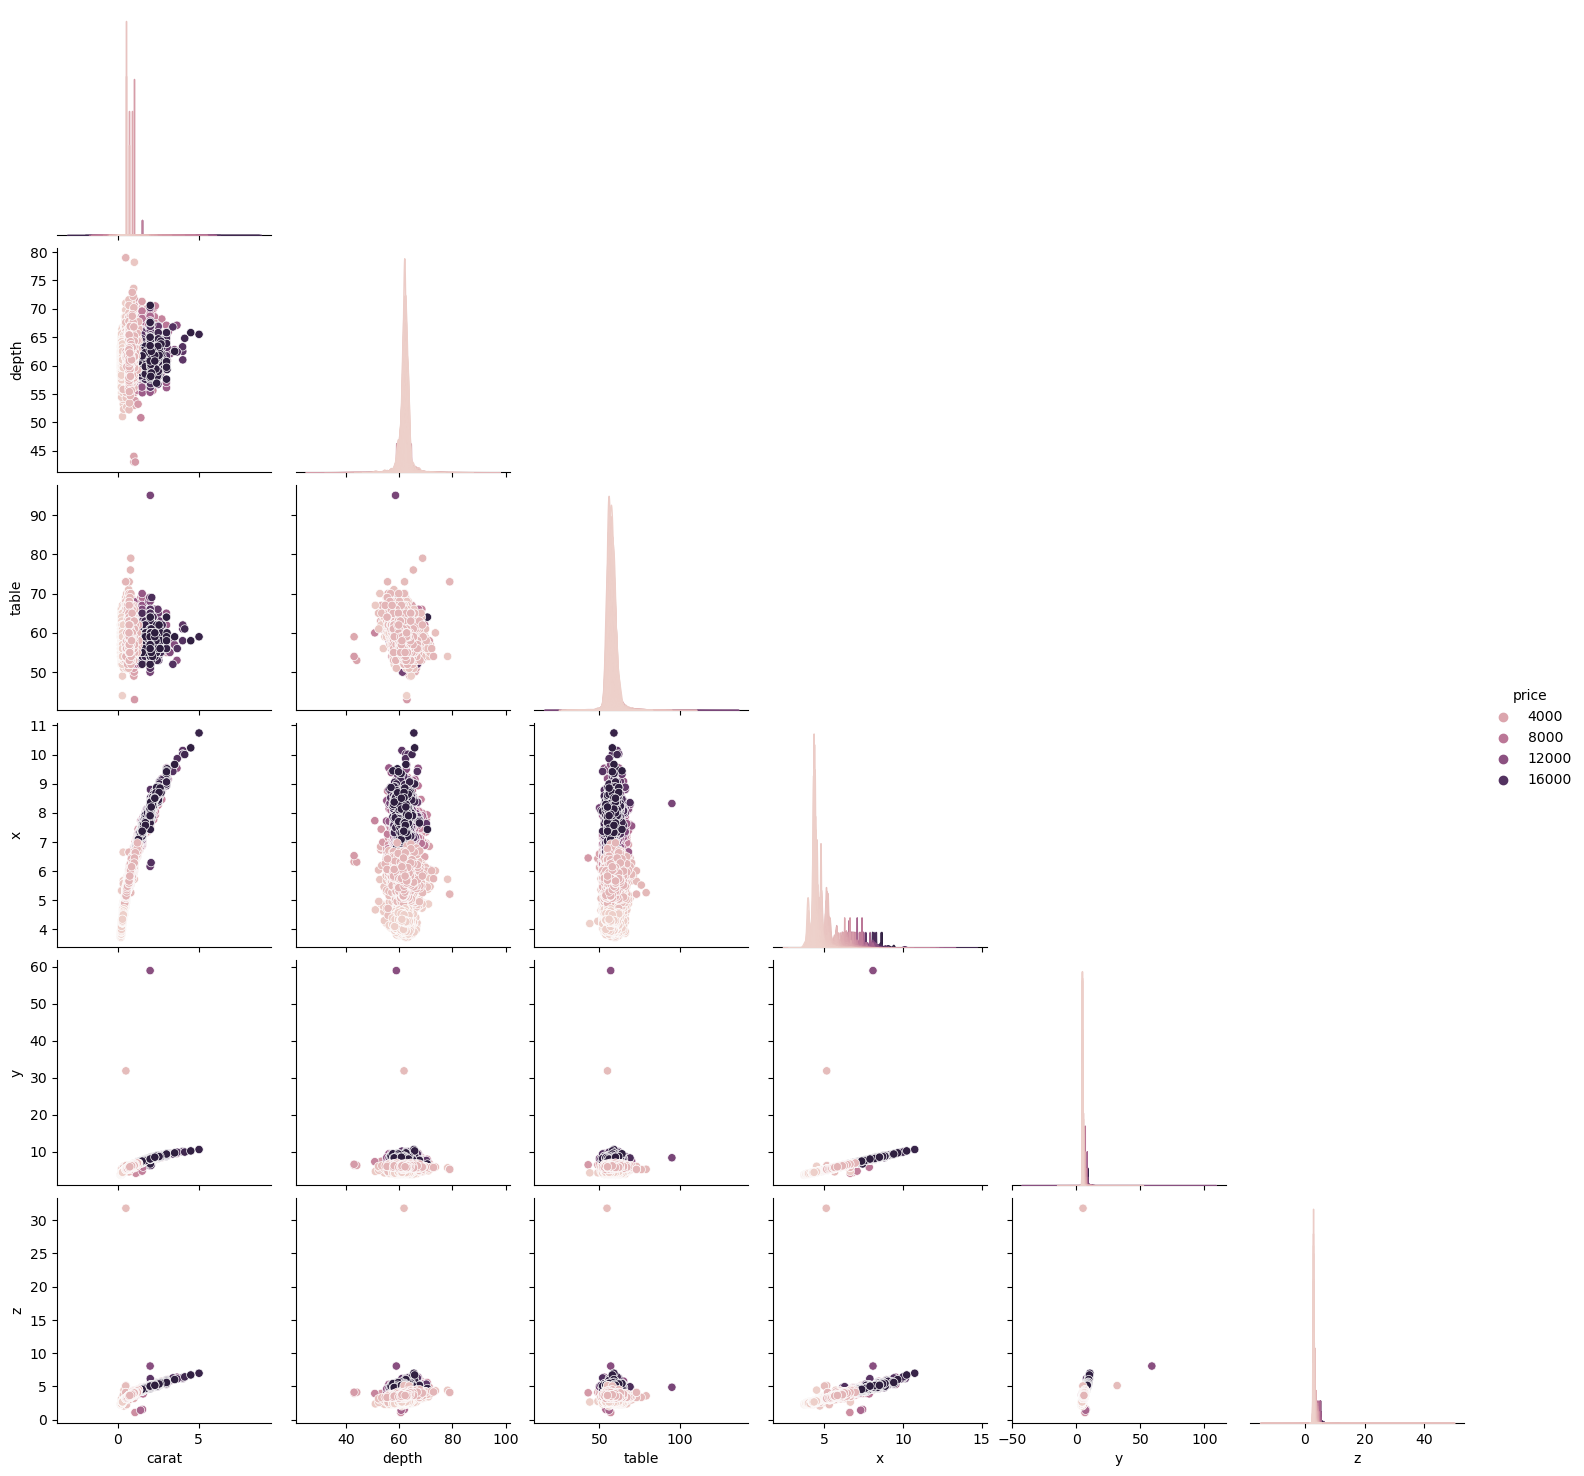

In [31]:
sns.pairplot(df, hue = 'price',corner=True )

D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


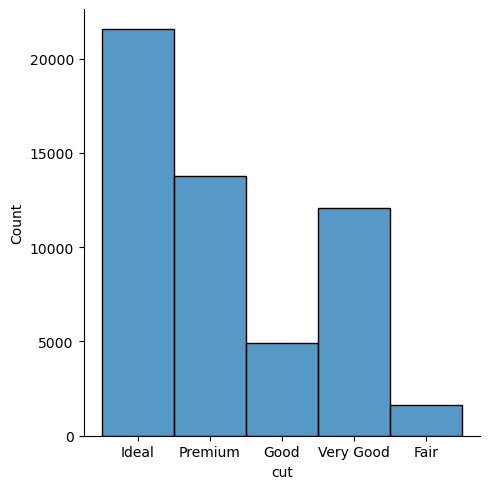

In [16]:
sns.displot(df['cut'])

D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


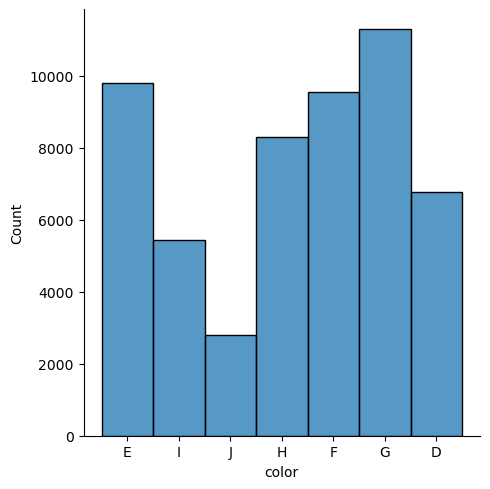

In [17]:
sns.displot(df['color'])

D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


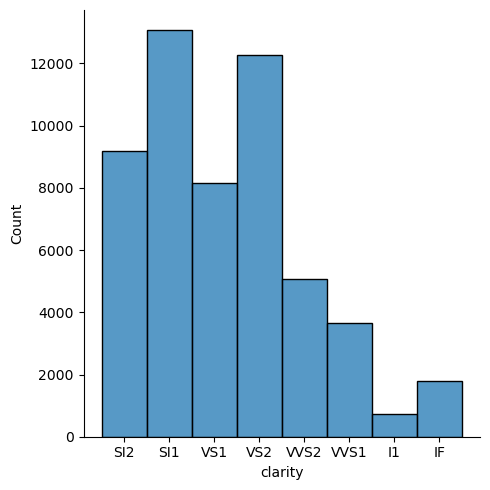

In [18]:
sns.displot(df['clarity'])

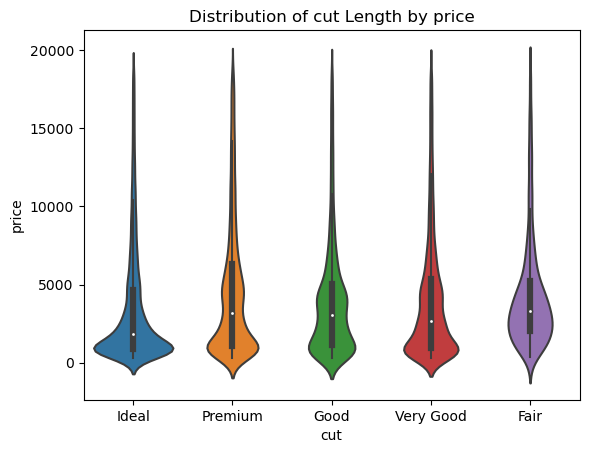

In [19]:
sns.violinplot(x="cut", y="price", data=df)
plt.title("Distribution of cut Length by price")
plt.xlabel("cut")
plt.ylabel("price")
plt.show()

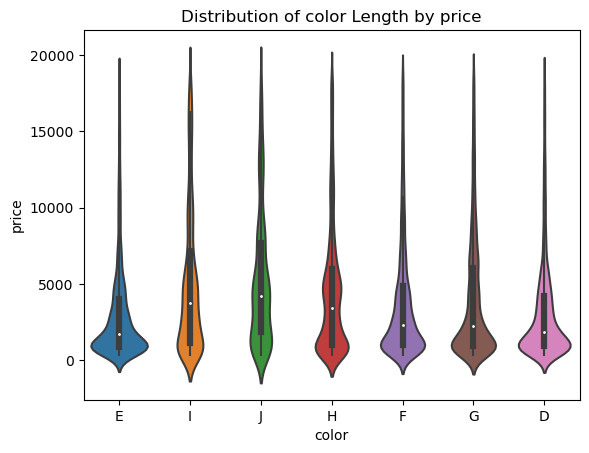

In [20]:
sns.violinplot(x="color", y="price", data=df)
plt.title("Distribution of color Length by price")
plt.xlabel("color")
plt.ylabel("price")
plt.show()

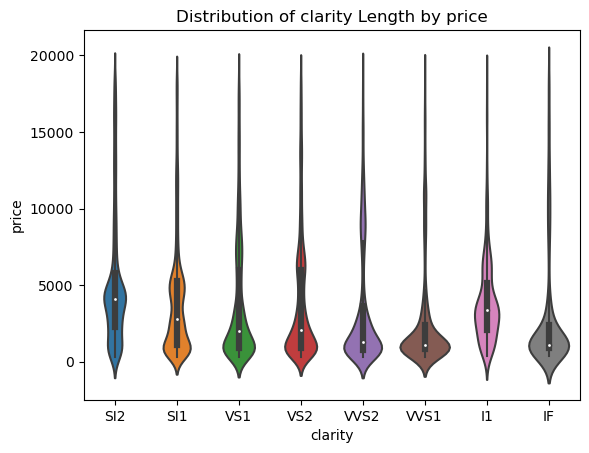

In [21]:
sns.violinplot(x="clarity", y="price", data=df)
plt.title("Distribution of clarity Length by price")
plt.xlabel("clarity")
plt.ylabel("price")
plt.show()

In [16]:
# Get list of categorical variables
s = (df.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


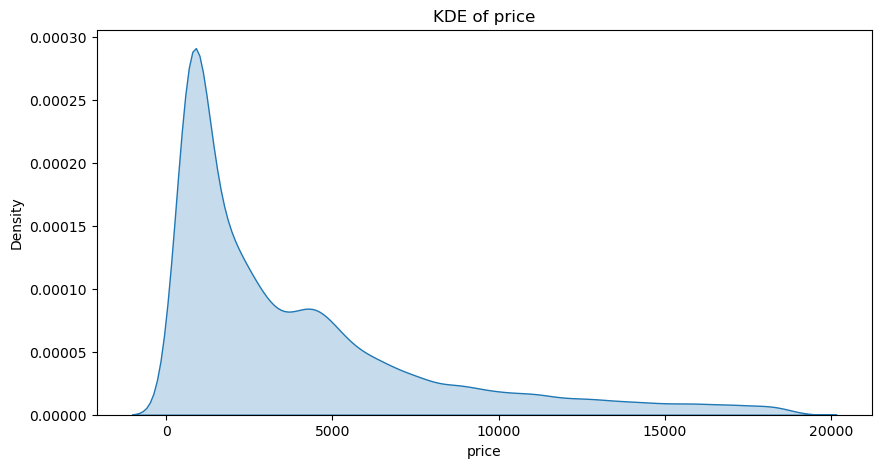

In [17]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['price'],fill=True)
plt.xlabel('price')
plt.title('KDE of price')
plt.show()

### DATA PREPROESSING 

In [18]:
label_data = df.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


### MODEL_BUILDING 

In [19]:
X= label_data.drop(["price"],axis =1)
y= label_data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=42)

In [20]:
pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

In [21]:
pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

In [22]:
pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])


In [23]:
pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",XGBRegressor())])

In [24]:
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]


In [25]:
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor"}

In [26]:
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [27]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -1462.356707 
DecisionTree: -770.914097 
RandomForest: -561.343349 
KNeighbors: -830.206521 
XGBRegressor: -556.222185 


In [28]:
# Model prediction on test data
pred = pipeline_xgb.predict(X_test)

In [29]:
pred

array([  968.88983,  8501.761  , 10658.524  , ...,  9830.862  ,
       17267.17   ,   983.7719 ], dtype=float32)

###  Model Evaluation👌📉

In [30]:
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.9816909559299921
Adjusted R^2: 0.9816787227156915
MAE: 273.92625132257933
MSE: 288079.34361677663
RMSE: 536.7302335594452


### CHOESE BEST MODEL 🎢👌

In [32]:
result=pd.DataFrame({"ALGORITHM":["LogisticRegression","SVC","DecisionTreeClassifier"
                                  ,"RandomForestClassifier","XGBRegressor"],
          "SCORE":[ -1462.356707 , -770.914097 ,-561.343349 ,-830.206521 ,-556.222185 ] })
result.style.background_gradient()

,ALGORITHM,SCORE
0,LogisticRegression,-1462.356707
1,SVC,-770.914097
2,DecisionTreeClassifier,-561.343349
3,RandomForestClassifier,-556.222185


In [33]:
ERORR =pd.DataFrame({"LogisticRegression":["R^2:","Adjusted R^2","MAE:"
                                  ,"MSE:","RMSE:"],
          "SCORE":[  0.9816909559299921, 0.9816787227156915 ,273.92625132257933 , 288079.34361677663, 536.7302335594452] })
result.style.background_gradient()

,ALGORITHM,SCORE
0,LogisticRegression,-1462.356707
1,SVC,-770.914097
2,DecisionTreeClassifier,-561.343349
3,RandomForestClassifier,-556.222185


### THANKS FOR VISITING 😍💓
### UPVOTES PLZ 